In [3]:
import math
import warnings
import numpy as np
from matplotlib import cm
import ipywidgets as widgets
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual

## 1. Logit/sigmoid function

Logistic regression is a baseline supervised algorithm for solving classification problem where outcome (target) is discrete.   The idea behind is that $\boldsymbol{\theta}^T\mathbf{x}$ will return a continous value and thus may not be suitable for classification task.  However, if we can find one function $g$ such that

$$g(\boldsymbol{\theta}^T\mathbf{x}) \in \{0, 1\}$$

then we can define our hypothesis function as $g$ and optimize accordingly based on some loss function.

It happens that $g$ (and also our hypothesis function h) can be defined as the sigmoid (logit) function as the following:

$$ h = g(\boldsymbol{\theta}^T\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}} $$

**Note:  e is also known as the Euler's number**

**Note: don't worry if you don't know what is a sigmoid function.  It is just some function that magically maps any value to value between 0 to 1.**

**Trivials**: 
$e$ is a really convenient number for math, for example whenever you take the derivative of $e^x$, you get $e^x$ back again.  It's the only function on Earth that will do that.  Also, $e^x$ always give you positive numbers, thus it is no surprise this $e$ was often used in probability/statistics.  Last, it is convenient to apply $\log$ in any optimization problem including $e$ since it will cancel it nicely and will also not change the optimization answer since $\log$ is monotically increasing.  Btw, the common log base we use in natural log, but it really does not matter because the base is merely a constant.

Let's see how does it look in code:

In [4]:
# z = wTx
def sigmoid(z, derivative=False):
    prob = 1 / ( 1 + np.exp(-z))
    
    if derivative:
        d_sigmoid = prob * (1 - prob)
        return d_sigmoid
    return prob

## 2. Derivative

Recall the derivative using quotient rule is        

$$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$

Given sigmoid function as

$$ g(x) = \frac{1}{1+e^{-x}} $$

Thus the derivative of sigmoid function is

$$
\begin{aligned}
    \frac{dg}{dx} &= \frac{0(1 + e^{-x}) - (-1)(e^{-x}))}{(1 + e^{-x})^2} \\
    &= \frac{e^{-x}}{(1 + e^{-x})^2}  = \frac{e^{-x} + 1 - 1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} - \frac{1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} \big(1 - \frac{1}{(1 + e^{-x})}\big)\\
    &= g(1 - g)
\end{aligned}
$$

**Note: once again, don't worry if you don't understand derivative very well.  The key here is just to be reminded that derivative is important for us to do gradient descent, ok?**

Let's look at the gradient by modifying our sigmoid function a little bit.

Max value of Derivative of sigmoid is : 0.25 at x = 0


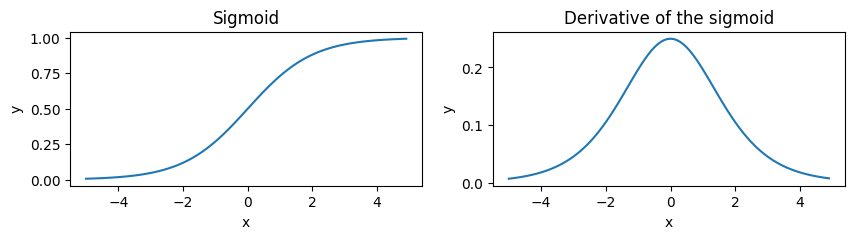

In [5]:
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, derivative=True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.plot(x, y)
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.plot(x, y_deriv)
ax2.set_title('Derivative of the sigmoid')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

print(f"Max value of Derivative of sigmoid is : 0.25 at x = 0")

In [9]:
from helper.utils import plot_h_theta_1d
interactive_plot = interact(plot_h_theta_1d,
         b=widgets.FloatSlider(min=-5, max=5, step=0.5, value=0),
         w=widgets.FloatSlider(min=-5, max=5, step=1, value=1));
# plot_h_theta_1d(b=0, w=1)

interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

In [10]:
from helper.utils import plot_linear_hyperplane
interact(plot_linear_hyperplane,
         b=widgets.FloatSlider(min=-5, max=5, step=1, value=0),
         w_magnitude=widgets.FloatSlider(min=0, max=3, step=0.2, value=2),
         w_angle=widgets.FloatSlider(min=-np.pi, max=np.pi, step=np.pi/8, value=0));
# plot_linear_hyperplane(b=0, w_magnitude=2, w_angle=0)

interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-5.0, step=1.0), FloatSlider(value=…

In [12]:
from helper.utils import plot_linear_logistic_2d
interact(plot_linear_logistic_2d,
         b=widgets.FloatSlider(min=-5, max=5, step=1, value=0),
         w_magnitude=widgets.FloatSlider(min=0.5, max=5, step=0.5, value=2),
         w_angle=widgets.FloatSlider(min=-np.pi, max=np.pi, step=0.5, value=0));

# plot_linear_logistic_2d(b = 0, w_magnitude=2, w_angle=-0.14)

interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-5.0, step=1.0), FloatSlider(value=…

**Trivials**: As you can see, the greatest gradient possible is 0.25.  Thus it means that in a gradient descent update, the update speed will be restricted by this value.

## 3. Defining Our Model (Hypothesis Function)

Let's say we have the following equation:

$$
\boldsymbol{z} = \boldsymbol{w}^T \mathbf{x} = w_{0} + w_{1} x_{1} + w_{2} x_{2}
$$

Given a point \((x_{1}, x_{2})\), when plugged into our sigmoid function, the equation could output a value that helps classify the point into one of the two classes. The output is typically interpreted as a probability.

The hypothesis function / model in logistic regression is given by:

$$
h(\mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-(w_{0} + w_{1} x_{1} + w_{2} x_{2})}}
$$



In [13]:
# model
def h_theta(x, w, b=0):
    z = (x @ w) + b
    return sigmoid(z)

In [22]:
X = np.array([-1, 0])
W = np.array([1, -2])
print("W transpose x = z :", X @ W)
print("sigmoid of theta transpose x: ", sigmoid(X @ W)) 
print("rounding for classification: ", np.round(sigmoid(X @ W)))  # sigmoid(X @ W) > 0.5 --> 1 else -->0

W transpose x = z : -1
sigmoid of theta transpose x:  0.2689414213699951
rounding for classification:  0.0


## 4. Loss function for Logistic Regression

Recall that we simply use the mean squared error for loss function in regression.  So what loss function to use in classification?

**binary cross-entropy**

$$J = - (\sum_{i=1}^m y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$

In [31]:
def cross_entropy_loss(y, h):
    loss = - np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    # loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

y_true     = np.array([1, 1, 1, 0, 0, 0])
bad_prediction  = np.array([0.01, 0.01, 0.01, 0.99, 0.99, 0.99])  #<---very bad prediction
good_prediction = np.array([0.86, 0.99, 0.778, 0.01, 0.01, 0.01])  #<---very good prediction

print("bad h should give high loss: ", cross_entropy_loss(y_true, bad_prediction))
print("good h should give low loss: ", cross_entropy_loss(y_true, good_prediction))

bad h should give high loss:  4.605170185988091
good h should give low loss:  0.07367549799205582


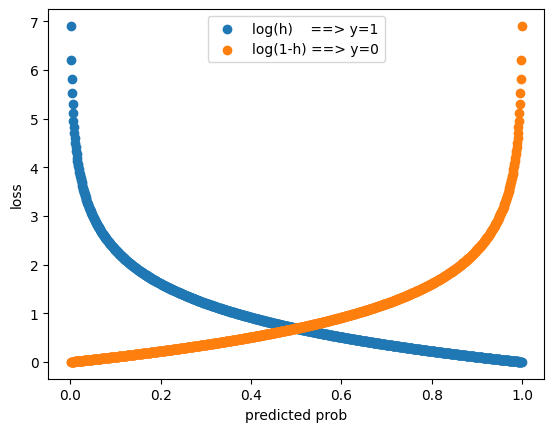

In [30]:
h = np.linspace(0.001, 0.999, 1000)
plt.scatter(h, -np.log(h), label='log(h)    ==> y=1')
plt.scatter(h, -np.log(1-h), label='log(1-h) ==> y=0')
plt.xlabel('predicted prob')
plt.ylabel('loss')
plt.legend();

Notice the behavior:

When y=1, 
- if prediction_prob=1, loss is near 0.  # Change it before uploading
- if h=0.01, loss is very high

when y=0,
- if h=0, loss is near 0.  
- if h=0.99, loss is very high

## 5. Gradient calculation of binary cross entropy

Recall that we need to find the gradient of the loss function in order to use gradient descent.

Calculating is easy. To make thing easy, let's imagine one training sample. Recall that 

$$J = - (y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$
$$h = \frac{1}{1+e^{-g}}$$
$$g = \boldsymbol{\theta}^T\mathbf{x}$$


Thus, gradient of $J$ in respect to some $\theta_j$ is

$$\frac{\partial J}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}$$
      
where

$$\frac{\partial J}{\partial h} = \frac{h^{(i)} - 
y^{(i)}}{h^{(i)}(1-h^{(i)})}$$
$$\frac{\partial h}{\partial g} = h^{(i)}(1-h^{(i)})$$
$$\frac{\partial g}{\partial \theta_j} = x_j$$

Thus, 

$$
\begin{aligned}
\frac{\partial J}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}\\
&= \frac{h^{(i)} - y^{(i)}}{h^{(i)}(1-h^{(i)})} * h^{(i)}(1-h^{(i)}) * x_j\\
&= (h^{(i)} - y^{(i)})x_j\\
\end{aligned}$$

We can also write the gradient as matrix form:

$$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$

Now that we learn the logit function and the loss function, we are now ready to implement logistic regression!

## MAIN : Binary Logistic Regression

Logistic regression is a binary **classification algorithm** by simply finding a best fitted line that separates two dataset.  In order to squash the output to a value between 0 and 1, logistic regression used a function called logit function (or sigmoid function)

### Implementation
    
1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m, )$
        - $\mathbf{w}$ -> $(n, )$
        - where $m$ is number of samples
        - where $n$ is number of features
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the *cross entropy* defined as
    $$J = - (\sum_{i=1}^m y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$
3. Calculate the gradient based on the loss
    $$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tolerance

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=500, batch_size=32):
        # Initialize parameters
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.weights = None  # To be initialized in fit()
        self.losses = []  # To keep track of loss over iterations

    def _sigmoid(self, z): # z = wTx
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))
    
    # our model
    def _h_theta(self, X):
        # Hypothesis function: sigmoid(X * weights) 
        return self._sigmoid(np.dot(X, self.weights)) # self._sigmoid((X @ self.weights)
    
    def _cross_entropy_loss(self, h, y):
        # Cross-entropy loss function
        return - np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    def _compute_loss_and_gradient(self, X, y):
        # Compute loss and gradient for current weights
        m = X.shape[0]
        h = self._h_theta(X)
        loss = self._cross_entropy_loss(h, y)
        grad = np.dot(X.T, (h - y)) / m  # Gradient of loss w.r.t. weights   X.T @ (h-y)
        return loss, grad

    def plot_decision_boundary(self, X, y, iteration, save=False):
        # Create a meshgrid to cover the feature space
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict probabilities for each point in the meshgrid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        if save:
            # Plot contour and training examples
            plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
            plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
            plt.title(f'Logistic Regression Decision Boundary - Iteration {iteration}')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')

            # Save the plot
            plt.savefig(f'frames/db_{iteration}.png')
            plt.close()

    def fit(self, X, y):
        m, n = X.shape
        # self.weights = np.zeros(n)  # Initialize weights to zeros
        # self.weights = np.random.uniform(-10, 10, n)
        self.weights = np.ones(n)  # Initialize weights to zeros ... W = [1, 1, 1, 1, 1, 1........] (n ones)

        # Create directory to store frames if it doesn't exist
        if not os.path.exists('frames'):
            os.makedirs('frames')

        for i in range(self.max_iter):
            # Shuffle the data correctly
            indices = np.random.permutation(m)
            X_shuffled = X[indices]  # Shuffle rows of X
            y_shuffled = y[indices]  # Shuffle rows of y (same order)

            # Mini-batch gradient descent
            for start in range(0, m, self.batch_size):
                end = start + self.batch_size
                batch_X = X_shuffled[start:end]  # Slice the shuffled batch of X
                batch_y = y_shuffled[start:end]  # Slice the shuffled batch of y
                
                if len(batch_X) == 0:  # Safety check for empty batch
                    continue

                loss, grad = self._compute_loss_and_gradient(batch_X, batch_y)
                self.weights = self.weights - self.learning_rate * grad  # Update weights
            
            # Calculate loss on the full dataset after each epoch
            epoch_loss, _ = self._compute_loss_and_gradient(X, y)
            self.losses.append(epoch_loss)

            # Capture and save the decision boundary every 100 iterations
            if i % 10 == 0:
                # print(f"Loss at iteration {i}: {epoch_loss:.4f}") #uncomment to print loss
                self.plot_decision_boundary(X, y, i, save=True)

        return self
    
    def predict_proba(self, X):
        # Predict probabilities
        return self._h_theta(X)
    
    def predict(self, X):
        # Predict binary labels
        # threshold of 0.5
        return np.round(self.predict_proba(X))
    
    def plot_loss(self):
        # Plot the loss over iterations
        plt.plot(range(len(self.losses)), self.losses, marker='o')
        plt.title("Loss over iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()


### Data Preparation

In [63]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [64]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


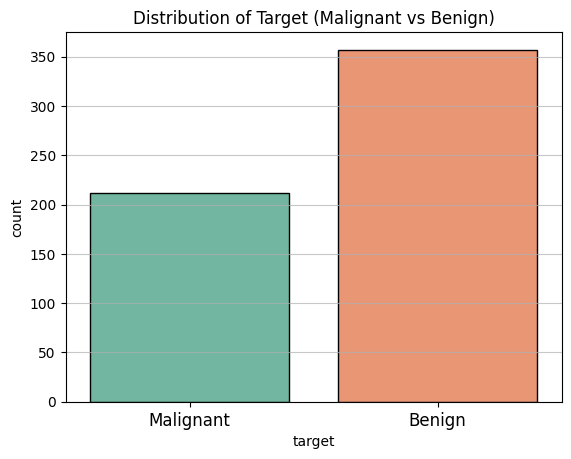

In [65]:
palette = sns.color_palette("Set2")  # You can choose other palettes like "husl", "coolwarm", etc.
sns.countplot(x='target', data=df, palette=palette, edgecolor='black')
plt.title("Distribution of Target (Malignant vs Benign)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'], fontsize=12)
plt.grid(axis='y',alpha=0.7)  # Add grid lines for better readability
plt.show()

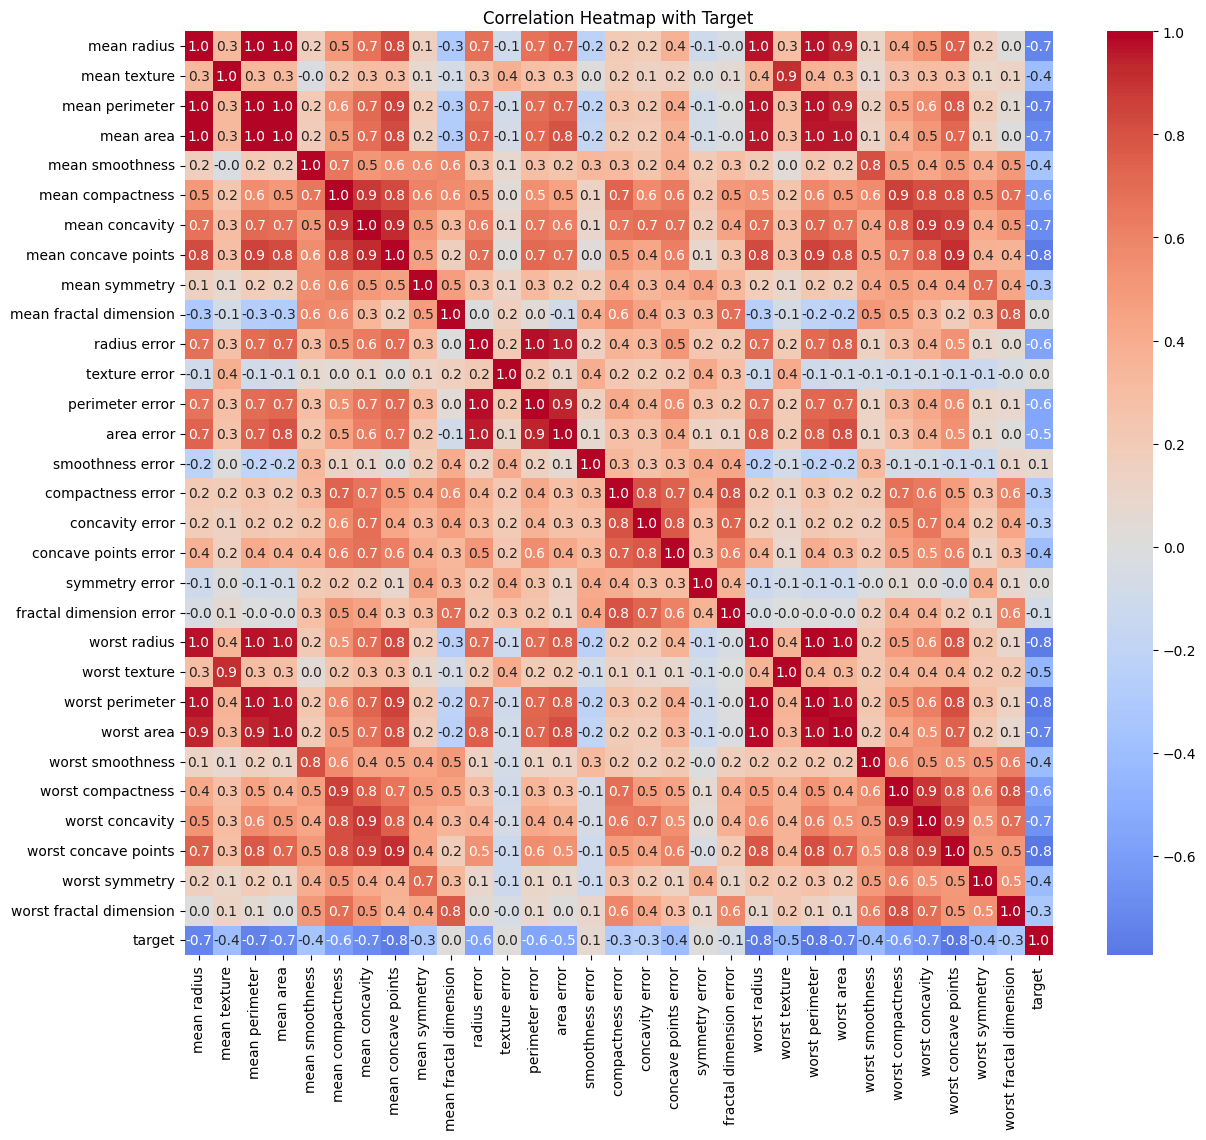

In [66]:
# Add the target variable to the DataFrame for correlation calculation
df_with_target = df.copy()

# Calculate the correlation matrix including the target
corr_matrix_with_target = df_with_target.corr()

# Plot heatmap including the target
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_with_target, cmap='coolwarm', annot=True, fmt=".1f", center=0)
plt.title("Correlation Heatmap with Target")
plt.show();


In [67]:
# Get correlations with the target
correlations = corr_matrix_with_target['target'].drop('target').abs()
# Sort features by correlation with the target
top = correlations.sort_values(ascending=False)
worst = correlations.sort_values(ascending=True)

# print("Features sorted by correlation with the target:\n", important_features)  # comment out to print
# Select top N features (e.g., top 10)
top_n = 10
top_features = important_features.head(top_n).index.tolist()
top_features = important_features.head(top_n).index.tolist()

print("Top features:", top_features)

Top features: ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']


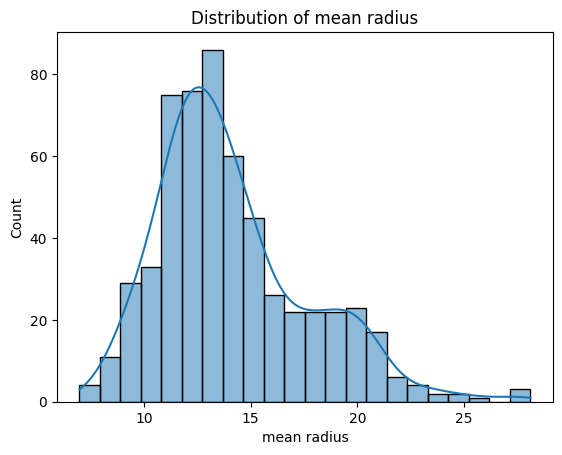

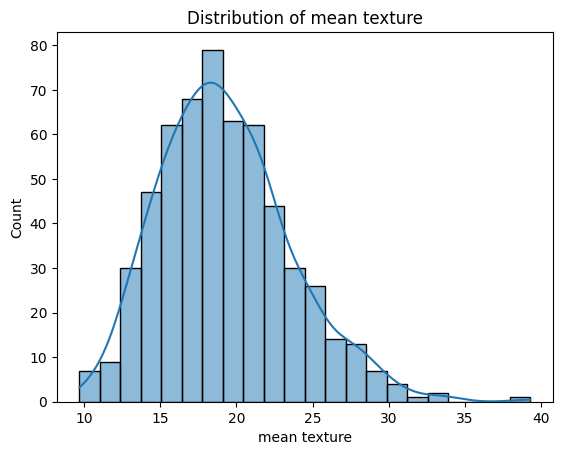

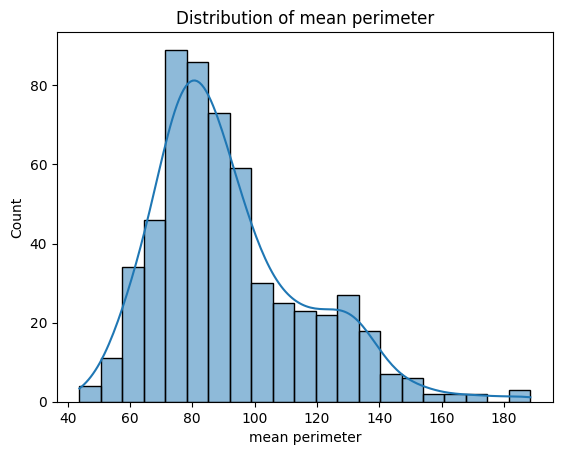

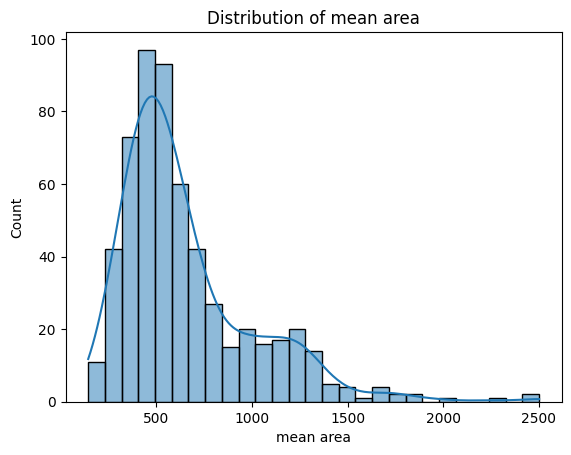

In [68]:
# Distribution plots for a few selected features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']  # write you feature name or add it 
for feature in features_to_plot:
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

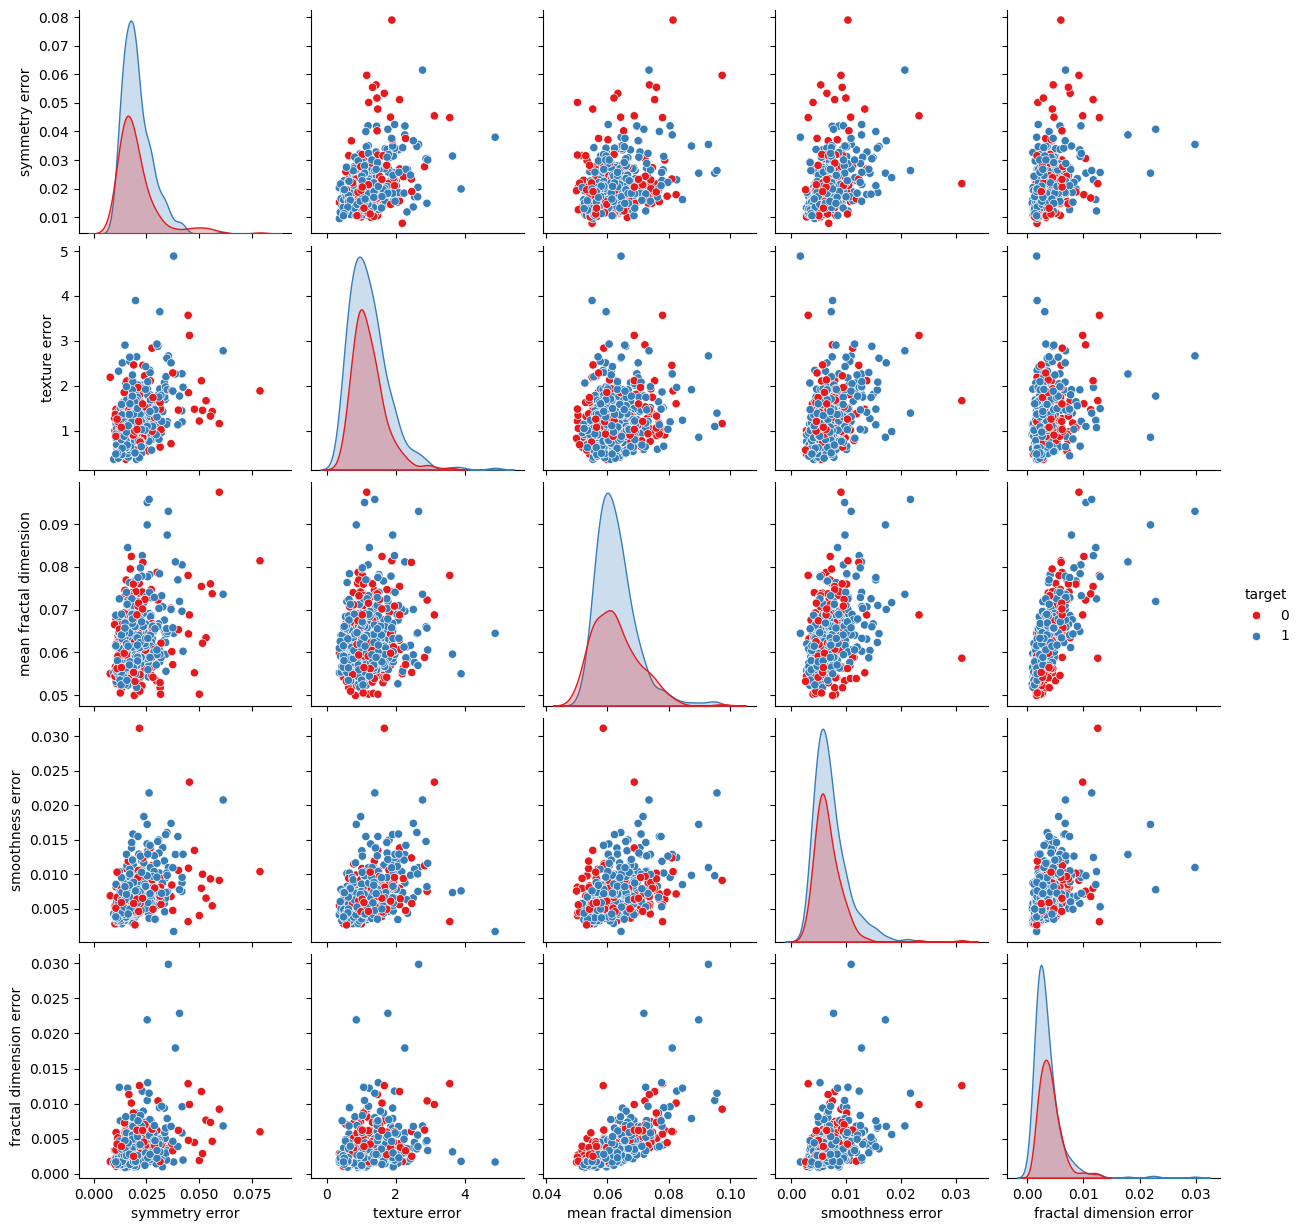

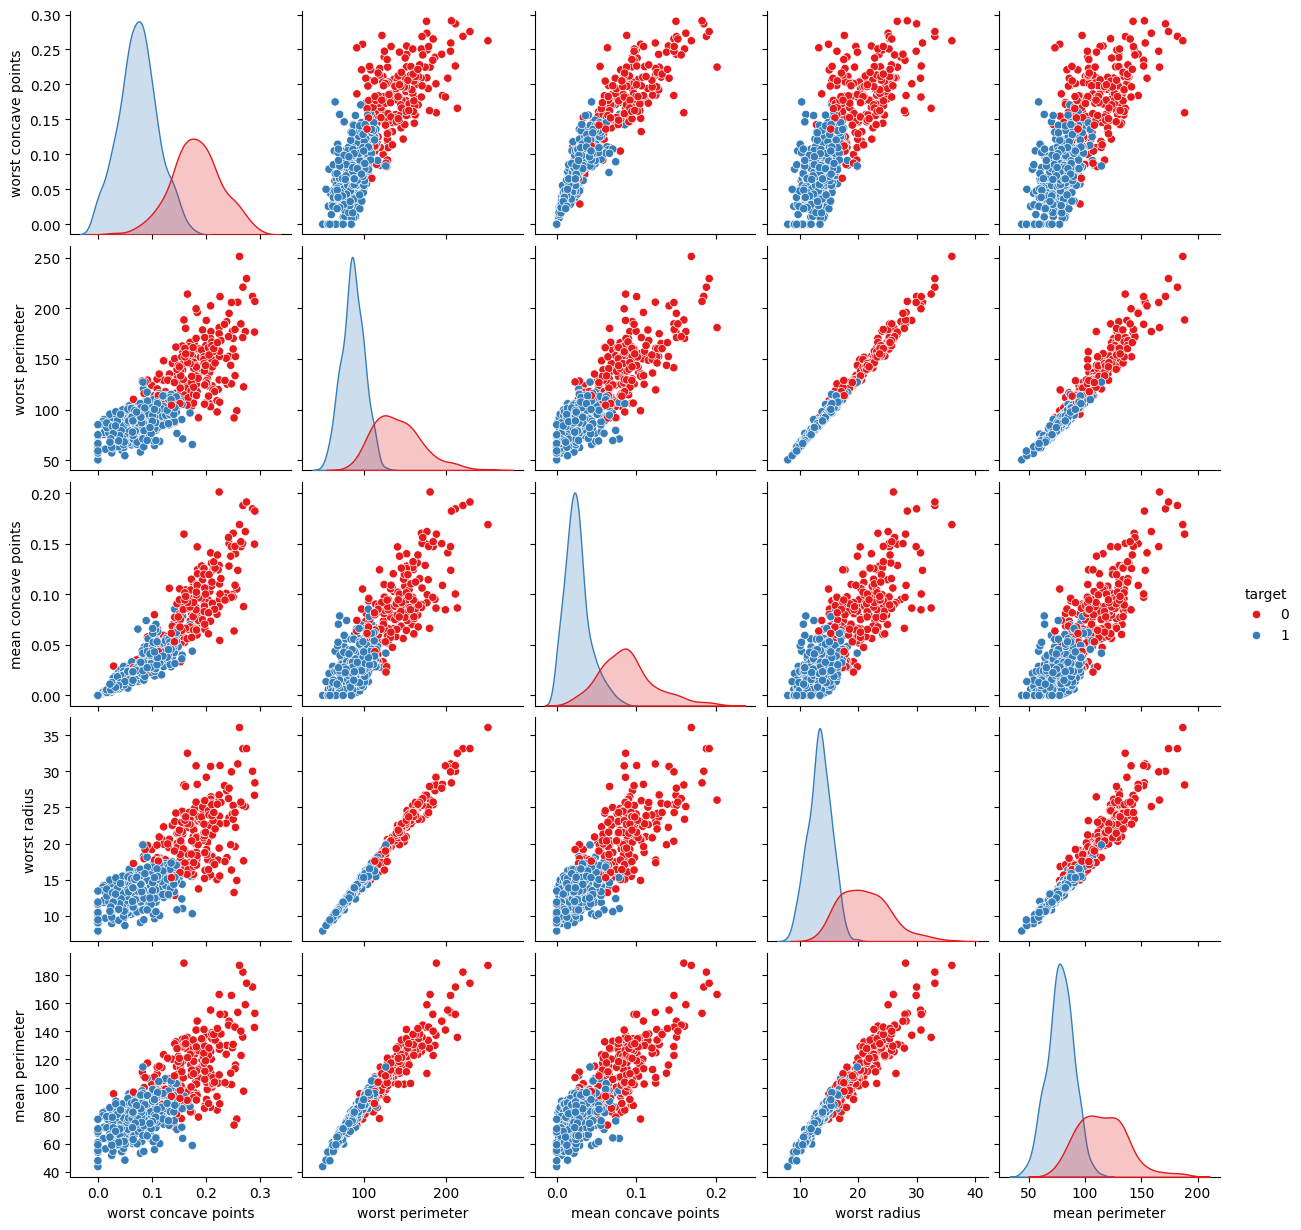

In [69]:
# Pairplot to explore relationships between selected features
# 7, 2, 5, 6, 1, 0, 3
# 0, 1, 2, 3, 5, 6, 7 asec
# 7,6, 5, 3, 2, 1, 0 dec

top_features = ['worst concave points', 'worst perimeter', 'mean concave points', 
                'worst radius', 'mean perimeter', 'worst area', 'mean radius', 
                'mean area', 'mean concavity', 'worst concavity']

worst_features = ['symmetry error', 'texture error', 'mean fractal dimension', 
                  'smoothness error', 'fractal dimension error', 'concavity error', 
                  'compactness error', 'worst fractal dimension', 'mean symmetry', 
                  'mean smoothness']

sns.pairplot(df, vars=worst_features[:5], hue='target', palette='Set1')
sns.pairplot(df, vars=top_features[:5], hue='target', palette='Set1')

plt.show()

In [70]:
data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

# Flag to choose between all features or top features
use_top_features = True  # Set to False to use all features

# Subset the DataFrame based on the flag
if use_top_features:
    X = df[['mean area', 'worst concavity']].values
    # X = df[worst_features[8:]].values
else:
    X = df.drop(columns='target').values
y = df['target'].values

# X = df[top_features].values if use_top_features else df.drop(columns='target').values

###  Uncomment for different dataset
<!-- import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, make_moons

# Function to generate spiral dataset
def create_spiral_data(n_points=200, n_classes=2):
    X = np.zeros((n_points * n_classes, 2))  # data matrix
    y = np.zeros(n_points * n_classes, dtype='uint8')  # class labels

    for j in range(n_classes):
        ix = range(n_points * j, n_points * (j + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    return X, y

# Function to generate dataset based on the dataset name
def generate_dataset(dataset_name):
    if dataset_name == 'spiral':
        # Generate spiral data
        return create_spiral_data(n_points=200, n_classes=2)
    elif dataset_name == 'moons':
        # Generate moons dataset
        return make_moons(n_samples=1000, noise=0.2, random_state=42)
    
    else:
        raise ValueError("Dataset not recognized. Available datasets: 'breast_cancer', 'spiral', 'moons'.")

# Function to plot data
def plot_data(X, y, dataset_name):
    plt.figure(figsize=(8, 6))
    
    if dataset_name == 'breast_cancer':
        # Since breast cancer data is high-dimensional, we plot first two features
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
        plt.title(f'{dataset_name.capitalize()} Dataset (First Two Features)')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        
    elif dataset_name in ['spiral', 'moons']:
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
        plt.title(f'{dataset_name.capitalize()} Dataset')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    plt.legend()
    plt.show()

# Example usage: Change dataset_name to 'breast_cancer', 'spiral', or 'moons'
dataset_name = 'moons'  # Choose between 'breast_cancer', 'spiral', or 'moons'
X, y = generate_dataset(dataset_name)
plot_data(X, y, dataset_name) -->


In [71]:
import imageio
from sklearn.metrics import accuracy_score
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature scaling (standardize the data)
# V.I.P to do in logistic regerssion
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

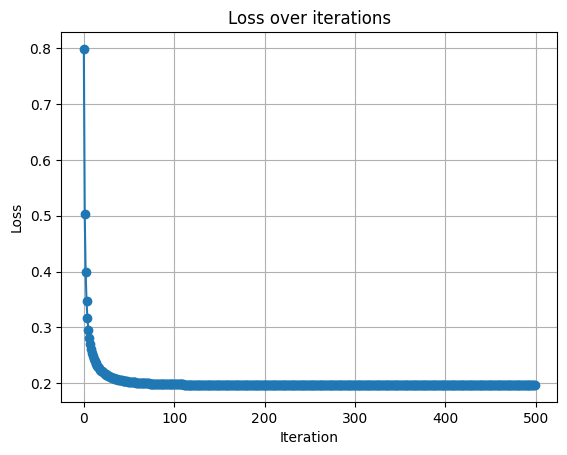

Accuracy: 92.11%


In [74]:
model = LogisticRegression(learning_rate=0.03, max_iter=500, batch_size=8)
model.fit(X_train, y_train)
model.plot_loss()

y_pred = model.predict(X_test) # Check test set perf
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Create a GIF from the saved frames
images = []
for i in range(0, 500, 10):  # Adjust step based on how frequently you saved frames
    filename = f'frames/db_{i}.png'
    images.append(imageio.imread(filename))
imageio.mimsave('db_spiral4.gif', images, fps=5)  # Save GIF



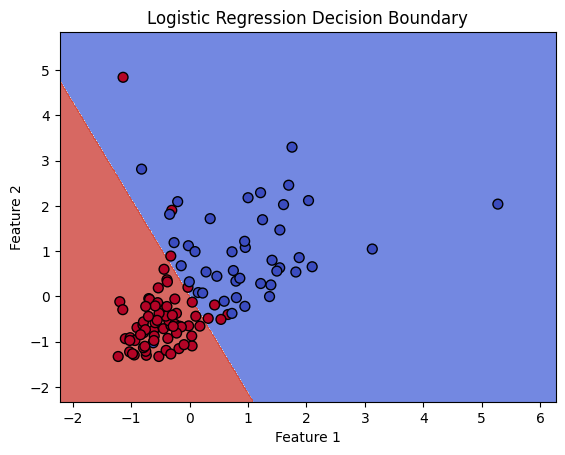

In [ ]:
#Decision Boundary Plot
def plot_decision_boundary(X, y, model):
    # Create a meshgrid to cover the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict probabilities for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, model)